## Audio Features - Comparing Groups (200s comparison)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = '~/OneDrive/Documents/UVA MSDS/Capstone/data files/'

In [4]:
# Read in audio and transcript features
df_audio = pd.read_csv(data_path + 'Teacher_Mindfulness_Audio_Transcript_Features_20230214.csv')
df_audio.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,Student_Word_Count,Teacher_Percent_Words,Total_Word_Rate,Teacher_Word_Rate,Student_Word_Rate,Total_Speaker_Line_Count,Teacher_Line_Count,Student_Line_Count,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,Mood,MFCC_1_Mean,MFCC_2_Mean,MFCC_3_Mean,MFCC_4_Mean,MFCC_5_Mean,MFCC_6_Mean,MFCC_7_Mean,MFCC_8_Mean,MFCC_9_Mean,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,MFCC_1_Var,MFCC_2_Var,MFCC_3_Var,MFCC_4_Var,MFCC_5_Var,MFCC_6_Var,MFCC_7_Var,MFCC_8_Var,MFCC_9_Var,MFCC_10_Var,MFCC_11_Var,MFCC_12_Var,MFCC_13_Var,MFCC_1_Skew,MFCC_2_Skew,MFCC_3_Skew,MFCC_4_Skew,MFCC_5_Skew,MFCC_6_Skew,MFCC_7_Skew,MFCC_8_Skew,MFCC_9_Skew,MFCC_10_Skew,MFCC_11_Skew,MFCC_12_Skew,MFCC_13_Skew,MFCC_1_Kurtosis,MFCC_2_Kurtosis,MFCC_3_Kurtosis,MFCC_4_Kurtosis,MFCC_5_Kurtosis,MFCC_6_Kurtosis,MFCC_7_Kurtosis,MFCC_8_Kurtosis,MFCC_9_Kurtosis,MFCC_10_Kurtosis,MFCC_11_Kurtosis,MFCC_12_Kurtosis,MFCC_13_Kurtosis,RMS_Mean,RMS_Max,RMS_Min,RMS_Std,Centroid_Mean,Centroid_Max,Centroid_Min,Centroid_Std,Bandwidth_Mean,Bandwidth_Max,Bandwidth_Min,Bandwidth_Std,Flatness_Mean,Flatness_Max,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,392,0.437590,2.258851,2.163121,2.339405,34,17,17,411,62,3.0,4,93.5,144.6,0.6,211.67,53.96,204.2,73,409,181,242,Reading,12.275767,11.248416,-11.403405,8.994111,-6.947085,3.552934,-2.149697,-13.171859,-11.721801,-13.183566,0.719455,-1.359205,2.892683,59.003330,428.052921,376.570811,480.629189,271.816805,240.442430,250.107968,218.737862,230.139384,183.706385,173.748565,163.662589,96.546882,-4.427178,-0.384546,-0.256914,0.305199,-0.266844,-0.182173,-0.167009,-0.289583,-0.229382,-0.212150,0.169246,0.047610,0.078353,24.993674,-1.021163,-0.388692,-0.197681,-0.027963,0.335898,0.345799,0.218810,0.077423,0.002506,0.748178,0.050016,0.413932,0.029641,0.234953,0.0,0.030134,1786.920458,9837.121455,0.0,1342.793978,1637.887678,4029.576143,0.0,736.167078,0.019112,1.000001,1.480000e-06,0.101342,0.106655,0.724121,0.0,0.111820,-41.060013,-12.580391,-92.580391,19.036415
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,503,0.279370,2.256787,2.267442,2.252683,47,23,24,255,39,3.0,5,50.5,86.0,0.6,244.32,56.67,242.1,80,421,208,278,speaking passionately,10.869401,9.074677,-11.908164,7.795241,-7.867180,-0.395680,-6.808521,-14.854105,-5.608134,0.335741,2.010402,-11.104792,-2.374372,117.844373,443.504212,340.872066,421.846288,392.088738,269.676208,282.780823,278.891346,201.598711,184.257387,180.524235,156.742620,103.860091,-3.403572,-0.447509,-0.170911,0.054505,-0.355915,0.015943,-0.269408,-0.323910,-0.181812,0.243745,0.255444,-0.148239,-0.153220,12.028351,-0.977772,-0.562810,-0.102892,-0.054601,0.898272,0.406222,-0.280488,0.297556,0.332433,0.374174,-0.063299,0.823779,0.027384,0.194261,0.0,0.029680,1880.643307,9922.177642,0.0,1412.091525,1741.747397,4338.004791,0.0,810.380525,0.038517,1.000001,2.170000e-06,0.168635,0.102524,0.819824,0.0,0.115759,-43.753429,-14.232292,-94.232292,21.297735
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,454,0.555338,3.252435,3.910345,2.687684,45,22,23,427,87,3.0,5,87.3,141.0,0.6,239.45,66.01,232.6,72,424,189,287,speaking passionately,11.718530,5.376386,-16.785159,14.851442,-1.599988,0.735789,-0.782310,-13.534004,-5.126506,-5.123688,-7.457674,-6.685852,-0.191224,103.212547,407.618625,404.010201,325.159615,254.870539,195.726934,270.849372,262.024990,174.123677,163.250007,181.294042,127.413792,87.696152,-3.331619,-0.295017,-0.139161,0.311863,-0.106684,-0.227299,-0.159920,-0.256241,-0.

In [5]:
# Read in survey data
df_survey = pd.read_csv(data_path + 'survey data.csv',
                        usecols = ['studyid', 'mindfulness'])
df_survey.head()

,studyid,mindfulness
0,201,1
1,202,0
2,203,1
3,204,0
4,205,1


In [6]:
# Join datasets
df = df_audio.merge(df_survey, 
                    left_on = 'ID', 
                    right_on = 'studyid')

In [7]:
df['ID'].describe()

count     89.000000
mean     292.865169
std       56.491590
min      201.000000
25%      223.000000
50%      316.000000
75%      338.000000
max      360.000000
Name: ID, dtype: float64

In [8]:
# Get list of all potential features in this data
feature_list = [feat for feat in df.columns if feat not in ['ID', 'studyid', 'mindfulness', 'Mood']]

In [28]:
df_300s = df[df['ID'] >= 300]
df_300s['ID'].describe()

count     60.000000
mean     330.500000
std       17.464249
min      301.000000
25%      315.750000
50%      330.500000
75%      345.250000
max      360.000000
Name: ID, dtype: float64

In [29]:
df_300s['mindfulness'].value_counts()

0    33
1    27
Name: mindfulness, dtype: int64

### 200s treatment vs control

In [10]:
# Filter to 200s
df_200s = df[df['ID'] < 300]
df_200s['ID'].describe()

count     29.000000
mean     215.000000
std        8.514693
min      201.000000
25%      208.000000
50%      215.000000
75%      222.000000
max      229.000000
Name: ID, dtype: float64

In [30]:
df_200s['mindfulness'].value_counts()

1    16
0    13
Name: mindfulness, dtype: int64

In [11]:
# Create empty df to hold t-test results
ttest_results_200s = pd.DataFrame()

In [12]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df_200s[df_200s['mindfulness']==0]
    df_1 = df_200s[df_200s['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_200s = pd.concat([ttest_results_200s, df_temp], axis=0)

In [13]:
ttest_results_200s.reset_index(inplace = True, drop = True)

In [14]:
# Sort by p-value to see which variables show the largest differences
ttest_results_200s.sort_values('p_value', inplace = True)
ttest_results_200s.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
5,Average_Teacher_Duration,9.742746,7.870995,2.015344,0.057932
4,Average_Speaker_Duration,7.438974,6.269873,1.994415,0.059620
15,Teacher_Line_Count,21.769231,25.500000,-1.882035,0.072017
102,Zero_Crossing_Rate_Std,0.088867,0.076854,1.863502,0.073315
14,Total_Speaker_Line_Count,44.615385,51.812500,-1.794375,0.085217
90,Centroid_Std,1063.577281,935.894816,1.731560,0.095006
65,MFCC_9_Skew,-0.234695,-0.154144,-1.675170,0.105541
16,Student_Line_Count,22.846154,26.312500,-1.673584,0.106980
64,MFCC_8_Skew,-0.222147,-0.151656,-1.654685,0.111469
101,Zero_Crossing_Rate_Min,0.000188,0.001312,-1.533921,0.143368


Observations

- More of these features are similar to those in the full participant results than the 300s (Avg Teacher Duration, Teacher Line Count, Zero Cross Rate Min, Zero Cross Rate Std)
- The 300 group had many more MFCC features than the other two groups & had 3 statistically significant features
- Both 200s and Full have Avg Teacher Duration as the top feature, whereas this was not a top feature at all in the 300 group
- The mean value for Avg Teacher Duration is the same for the treatment group, but is slightly higher among the 200s for the control group

### EDA Top Features

In [15]:
top_10_feats = ttest_results_200s.head(10).feature.to_list()

Feature: Average_Teacher_Duration
P-value: 0.0579


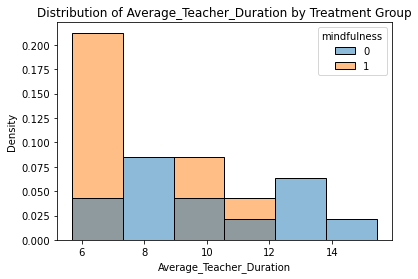

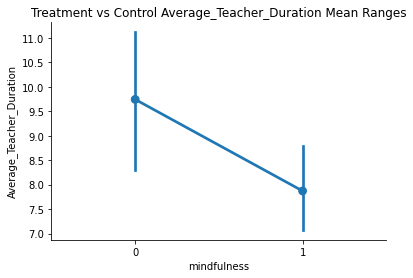


Feature: Average_Speaker_Duration
P-value: 0.0596


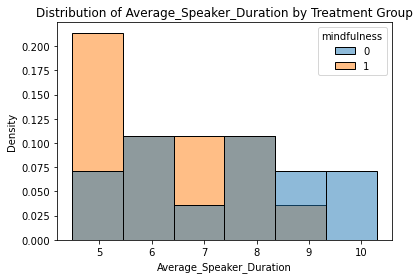

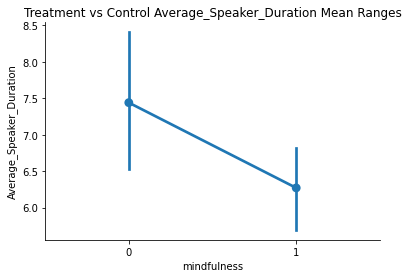


Feature: Teacher_Line_Count
P-value: 0.072


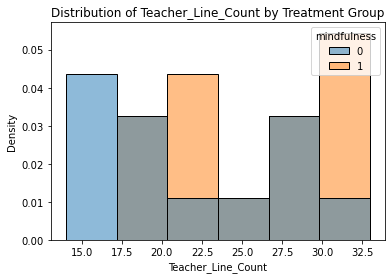

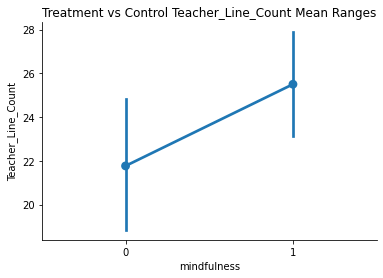


Feature: Zero_Crossing_Rate_Std
P-value: 0.0733


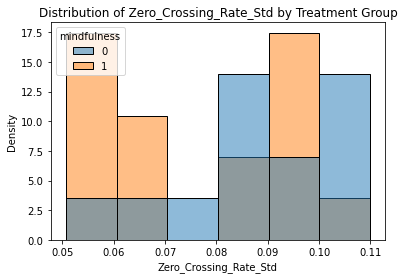

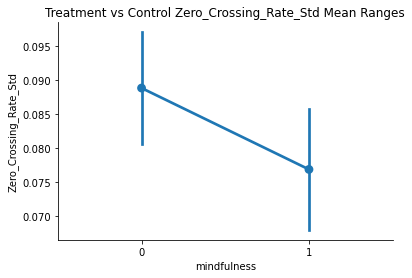


Feature: Total_Speaker_Line_Count
P-value: 0.0852


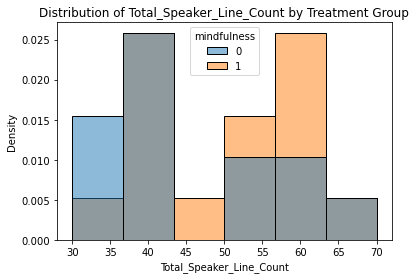

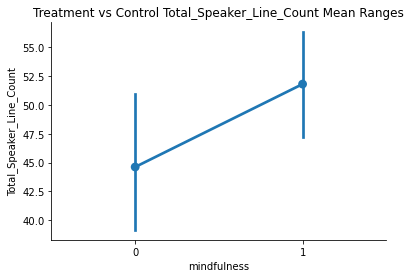


Feature: Centroid_Std
P-value: 0.095


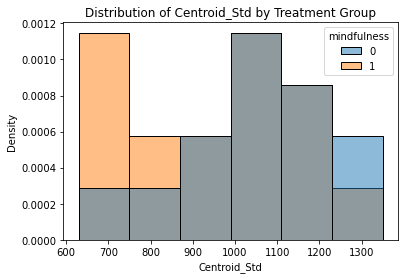

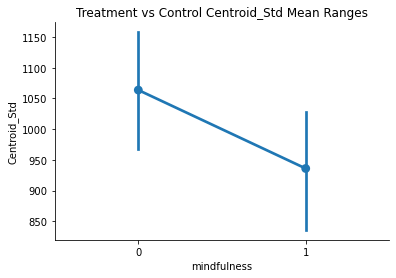


Feature: MFCC_9_Skew
P-value: 0.1055


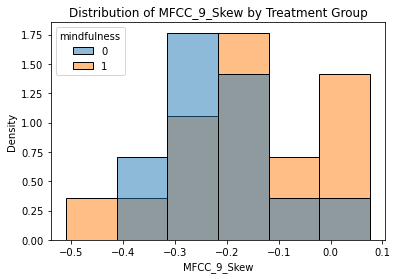

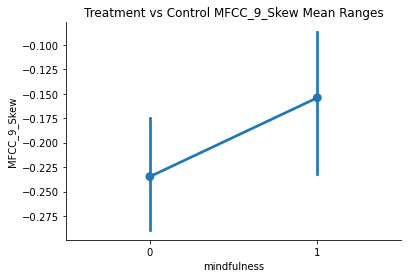


Feature: Student_Line_Count
P-value: 0.107


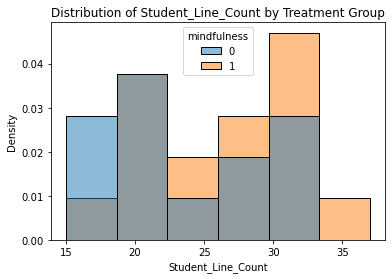

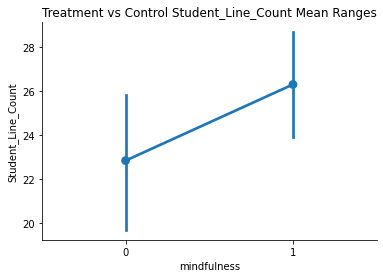


Feature: MFCC_8_Skew
P-value: 0.1115


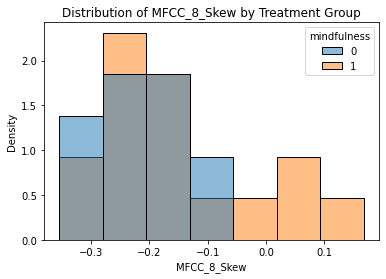

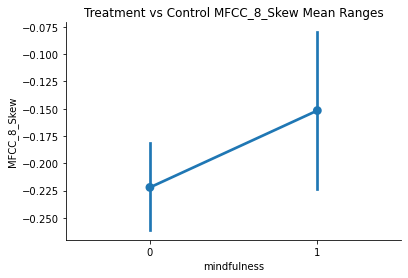


Feature: Zero_Crossing_Rate_Min
P-value: 0.1434


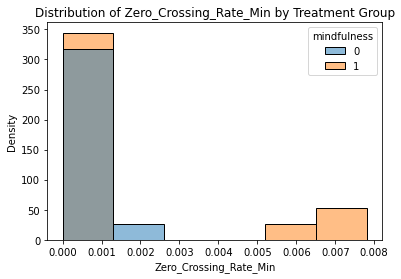

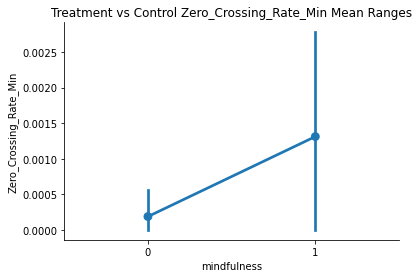

In [16]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_200s[ttest_results_200s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df_200s, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df_200s)
    sns.despine()
    plt.title(f'Treatment vs Control {feat} Mean Ranges')
    plt.show()
    print()

### 300 vs 200

In [17]:
# Add column for 200s vs 300s
df['group'] = np.where(df['ID'] >= 300, '300s', '200s')

In [36]:
# df.sample(10)

In [18]:
# Create empty df to hold t-test results
ttest_results_200s_v_300s = pd.DataFrame()

In [23]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['group']=='200s']
    df_1 = df[df['group']=='300s']
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_200s': df_0[feat].mean(),
                            'mean_300s': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_200s_v_300s = pd.concat([ttest_results_200s_v_300s, df_temp], axis=0)

In [24]:
ttest_results_200s_v_300s.reset_index(inplace = True, drop = True)

In [25]:
# Sort by p-value to see which variables show the largest differences
ttest_results_200s_v_300s.sort_values('p_value', inplace = True)
ttest_results_200s_v_300s.head(10)

,feature,mean_200s,mean_300s,t_statistic,p_value
57,MFCC_1_Skew,-0.801221,-3.750443,25.878138,2.711811e-39
96,Flatness_Max,0.131880,1.000001,-84.765909,2.640238e-35
88,Centroid_Max,6372.384819,9724.467505,-21.033697,6.427598e-33
98,Flatness_Std,0.009449,0.157904,-22.592488,2.108547e-31
93,Bandwidth_Min,384.041096,0.000000,39.676015,3.734963e-26
105,Loudness_Min,-73.697797,-94.596889,29.561133,1.679432e-24
45,MFCC_2_Var,256.305721,409.522981,-16.844373,4.062862e-24
70,MFCC_1_Kurtosis,-0.535417,16.928835,-15.364110,2.065599e-22
95,Flatness_Mean,0.003358,0.037720,-13.694469,2.557754e-20
44,MFCC_1_Var,17.760579,107.627491,-13.420670,1.014951e-19


### EDA Top Features

In [31]:
top_10_feats = ttest_results_200s_v_300s.head(10).feature.to_list()

Feature: MFCC_1_Skew
P-value: 0.0


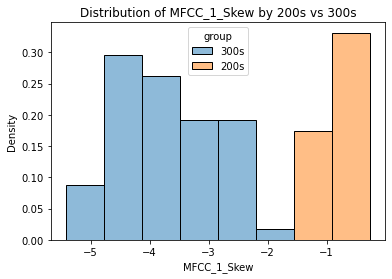

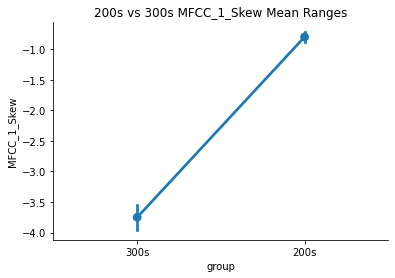


Feature: Flatness_Max
P-value: 0.0


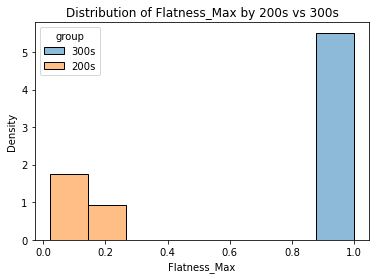

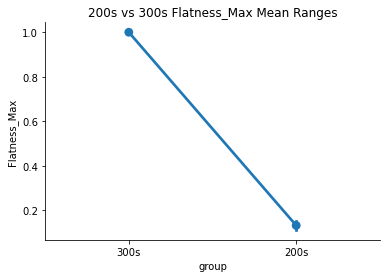


Feature: Centroid_Max
P-value: 0.0


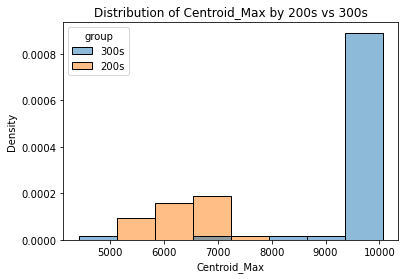

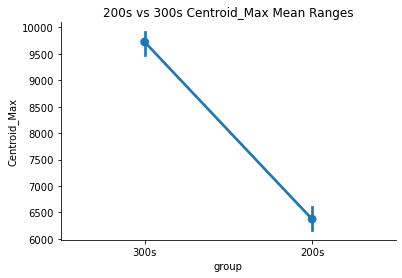


Feature: Flatness_Std
P-value: 0.0


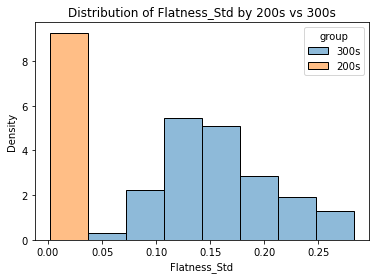

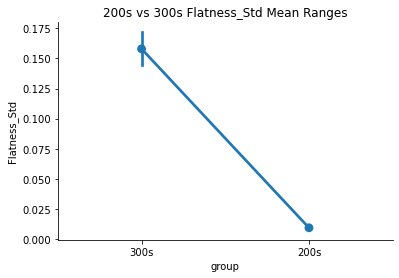


Feature: Bandwidth_Min
P-value: 0.0


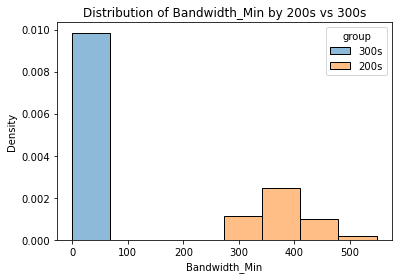

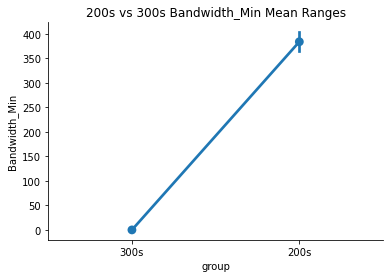


Feature: Loudness_Min
P-value: 0.0


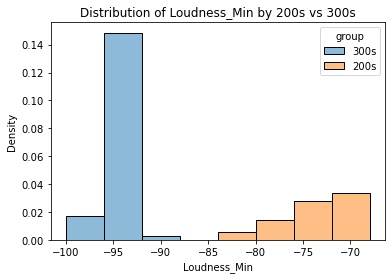

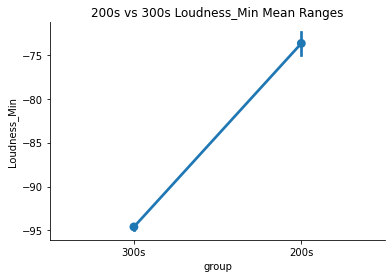


Feature: MFCC_2_Var
P-value: 0.0


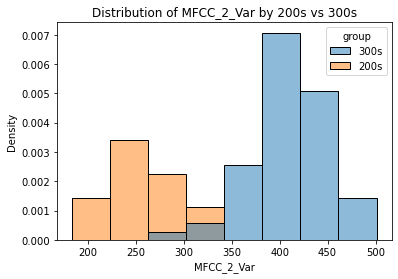

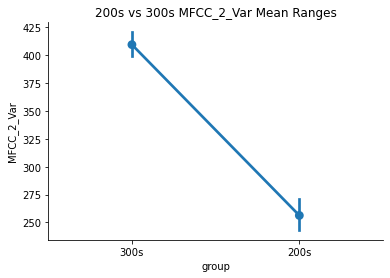


Feature: MFCC_1_Kurtosis
P-value: 0.0


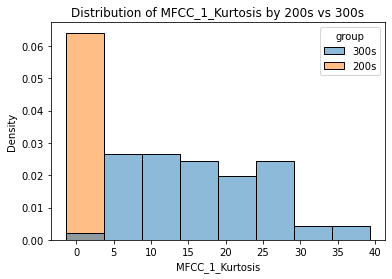

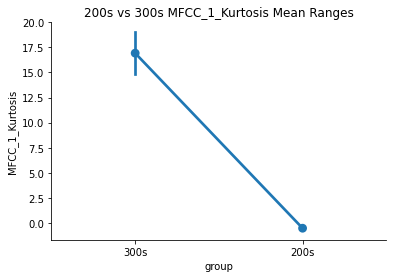


Feature: Flatness_Mean
P-value: 0.0


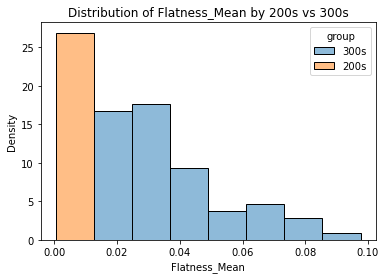

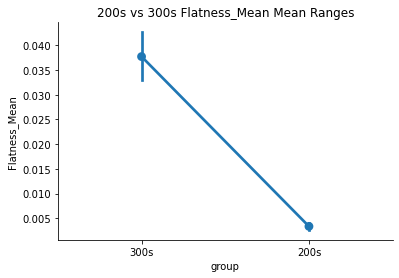


Feature: MFCC_1_Var
P-value: 0.0


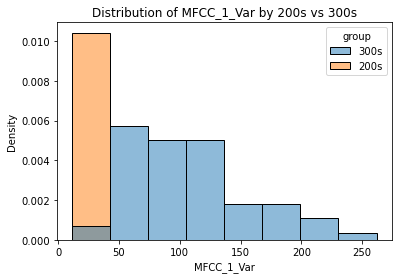

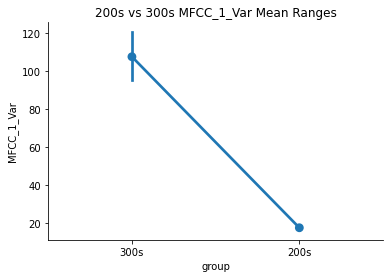

In [35]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_200s_v_300s[ttest_results_200s_v_300s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'group',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by 200s vs 300s')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'group', y = feat, data = df)
    sns.despine()
    plt.title(f'200s vs 300s {feat} Mean Ranges')
    plt.show()
    print()

### Survey Data by 200 vs 300

In [37]:
df_survey = pd.read_csv(data_path + 'survey data.csv')
df_survey.head()

,Unnamed: 0,studyid,mindfulness,Race,Gender,firstgenedu,efficacy,perceived_overall_stress,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,0,201,1,4.0,0.0,NaN,4.4,5.4,4.25,6.00,1.0,5.50,3.181818,1.0,0.0,0.0,0.0,NaN
1,1,202,0,1.0,0.0,NaN,4.6,2.0,1.00,2.25,1.0,3.25,2.909091,1.0,1.0,1.0,0.0,NaN
2,2,203,1,1.0,0.0,NaN,3.6,4.0,3.25,4.75,1.0,3.75,3.909091,0.0,0.0,1.0,0.0,NaN
3,3,204,0,6.0,0.0,NaN,3.6,2.8,4.00,3.50,NaN,3.50,3.545455,2.0,1.0,1.0,0.0,NaN
4,4,205,1,1.0,0.0,NaN,3.4,4.4,5.75,3.75,0.0,3.50,3.454545,0.0,1.0,0.0,0.0,0.0


In [39]:
# Get list of all potential features in this data
survey_feature_list = ['efficacy', 'perceived_overall_stress', 'burnout', 
                       'anticipatory_stress', 'perceived_sim_stress', 'emotional_labor']

In [41]:
# Add column for 200s vs 300s
df_survey['group'] = np.where(df_survey['studyid'] >= 300, '300s', '200s')

In [45]:
# df_survey.sample(10)

In [54]:
# Create empty df to hold t-test results
survey_groups_ttest_results = pd.DataFrame()

In [55]:
for feat in survey_feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    survey_df_0 = df_survey[df_survey['group']=='200s']
    survey_df_1 = df_survey[df_survey['group']=='300s']
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = survey_df_0[feat], 
                                  b = survey_df_1[feat],
                                  equal_var = False,
                                  nan_policy = 'omit')
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_200s': survey_df_0[feat].mean(),
                            'mean_300s': survey_df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    survey_groups_ttest_results = pd.concat([survey_groups_ttest_results, df_temp], axis=0)

In [56]:
survey_groups_ttest_results.reset_index(inplace = True, drop = True)

In [57]:
# Sort by p-value to see which variables show the largest differences
survey_groups_ttest_results.sort_values('p_value', inplace = True)
survey_groups_ttest_results.head(10)

,feature,mean_200s,mean_300s,t_statistic,p_value
3,anticipatory_stress,3.543103,3.073770,2.162433,0.035276
2,burnout,3.301724,3.687500,-1.350178,0.182447
4,perceived_sim_stress,3.548851,3.308333,0.938016,0.352792
1,perceived_overall_stress,3.400000,3.565385,-0.831087,0.409476
5,emotional_labor,3.219436,3.070758,0.760100,0.450343
0,efficacy,3.786207,3.799038,-0.088643,0.929591


Observations

- The only significant feature is anticipatory stress (<0.05) where the mean value is slightly more for the 200 group than 300 group

- The 300s has double the number of cases as the 200s 
- The 200s were all conducted pre-pandemic (March 2020 or before), while 300s were all conducted post-pandemic lockdowns (starting late Sept 2021 onward)